In [1]:
import pandas as pd
import numpy as np
import matplotlib ; import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
%matplotlib inline
matplotlib.rc("axes" , unicode_minus = False)

plt.rcParams['font.family'] = 'NanumGothic'

# 실습 1 
차원축소 pca

In [2]:
df_raw = pd.read_csv("IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Sepal Length : 꽃받침의 길이 정보이다. <BR>

Sepal Width : 꽃받침의 너비 정보이다.  <BR>

Petal Length : 꽃잎의 길이 정보이다.  <BR>

Petal Width : 꽃잎의 너비 정보이다.   <BR>

Species : 꽃의 종류 정보이다.  setosa / versicolor / virginica 의 3종류로 구분된다. 


In [4]:
df_raw["SPECIES"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df_raw_x = df_raw.drop("SPECIES",axis = 1)
df_raw_y = df_raw["SPECIES"]
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


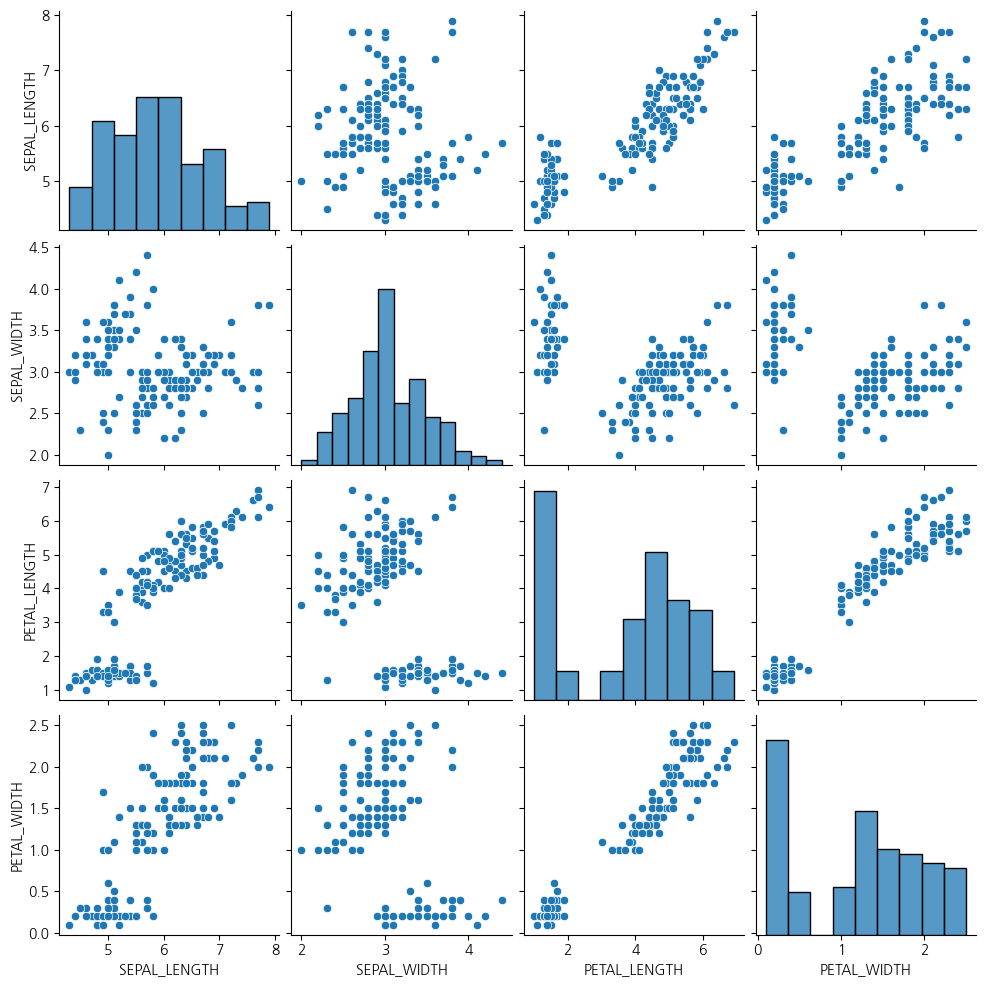

In [6]:
# x변수의 산점도 행렬

sns.pairplot(df_raw_x)

설명변수의 산점도를 살펴보면 (PETAL_LENGTH , SEPAL_LENGTH) , (PETAL_LENGTH , PETAL_WIDTH) 변수들끼리 강한상관관계가 있는 것으로 보인다.

In [8]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [9]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [10]:
# standard 스케일링

x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print("shape : \n {}".format(nd_scaled.shape))

Scaled Data : 
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
shape : 
 (150, 4)


주성분 분석을 하기 위해서 변수들을 각각 standard 스케일링을 진행하였다.

In [11]:
df_scaled = pd.DataFrame(nd_scaled, columns =x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [12]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [13]:
# 주성분 분석

pca = PCA()
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data : \n {}".format(nd_pca[:5]))
print("Shape : \n {}".format(nd_pca.shape))

PCA Data : 
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape : 
 (150, 4)


In [14]:
df_pca = pd.DataFrame(nd_pca, columns =["Prin1" , "Prin2" ,"Prin3" ,"Prin4"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.901,1.019,-1.340,-1.315,-2.265,0.480,-0.128,-0.024
1,-1.143,-0.132,-1.340,-1.315,-2.081,-0.674,-0.235,-0.103
2,-1.385,0.328,-1.397,-1.315,-2.364,-0.342,0.044,-0.028
3,-1.507,0.098,-1.283,-1.315,-2.299,-0.597,0.091,0.066
4,-1.022,1.249,-1.340,-1.315,-2.390,0.647,0.016,0.036


In [15]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValuesRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValuesRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValuesRatio,CumEigenValuesRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


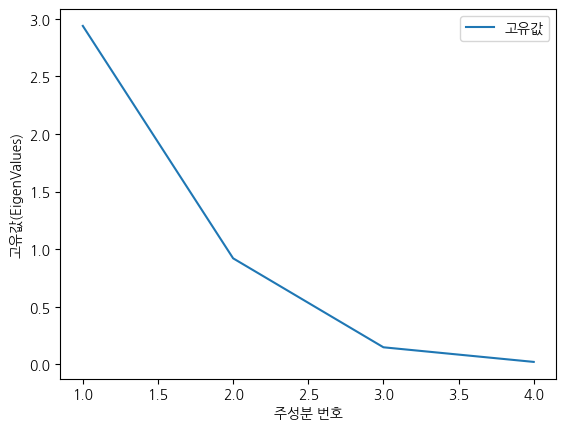

In [16]:
plt.plot(df_pca_stat["PrinNo"] , df_pca_stat["EigenValues"] , label = "고유값")
plt.ylabel("고유값(EigenValues)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

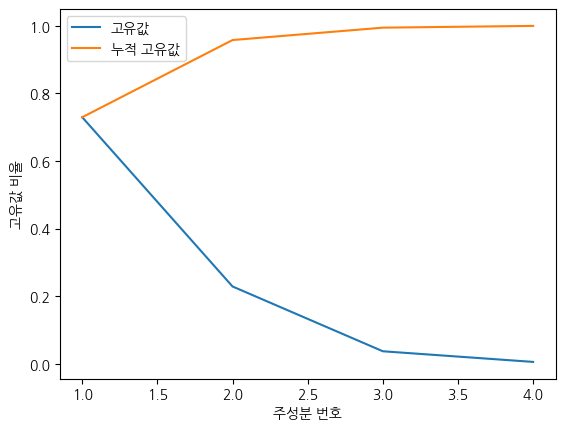

In [17]:
plt.plot(df_pca_stat["PrinNo"] , df_pca_stat["EigenValuesRatio"] , label = "고유값")
plt.plot(df_pca_stat["PrinNo"] , df_pca_stat["CumEigenValuesRatio"] , label = "누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

주성분이 2개 일때 설명력이 0.9가 넘어가고 고유값의 기울기가 2구간에서 급하게 변하므로 주성분 개수를 2개로 분석하겠다.


In [18]:
x_cols = pd.DataFrame({"Feature" : df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T ,\
                                                columns = ["Prin1" , "Prin2" ,"Prin3" ,"Prin4"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,0.521,0.377,-0.720,-0.261
1,SEPAL_WIDTH,-0.269,0.923,0.244,0.124
2,PETAL_LENGTH,0.580,0.024,0.142,0.801
3,PETAL_WIDTH,0.565,0.067,0.634,-0.524


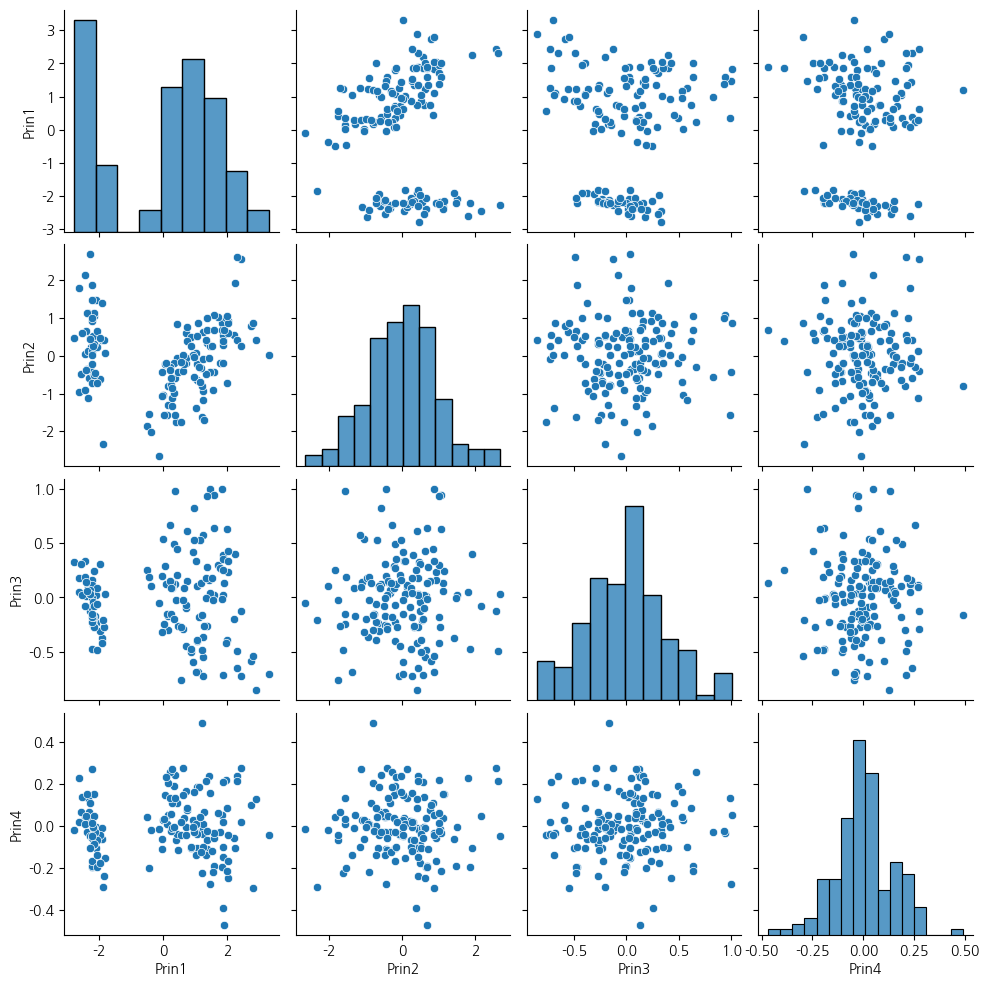

In [19]:
# 주성분 상관분석
sns.pairplot(df_pca)

품종 데이터이다 보니 원래 데이터가 구분되어 있어서 산점도가 이렇게 나타난 것으로 보인다.

In [20]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,-0.0,0.0,-0.0
Prin2,-0.0,1.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,0.0
Prin4,-0.0,-0.0,0.0,1.0


주성분 분석을 하여 서로 다 독립인 것을 확인하였다.

In [24]:
df

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
df_final = df_pca.loc[:,["Prin1","Prin2"]].join(df["SPECIES"])
df_final

,Prin1,Prin2,SPECIES
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


<Axes: xlabel='Prin1', ylabel='Prin2'>

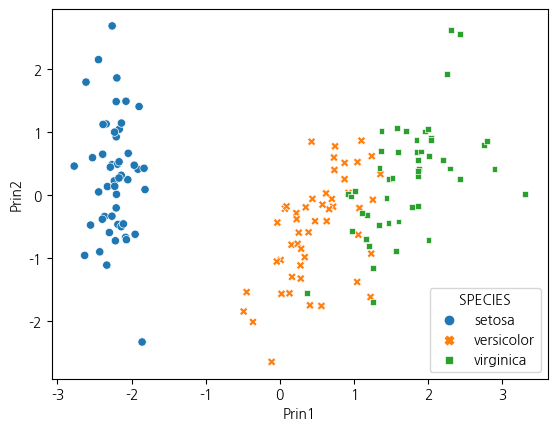

In [33]:
sns.scatterplot(x = "Prin1", y = "Prin2", hue = "SPECIES" ,style = "SPECIES", data = df_final)

사용한 pc1 , pc2 의 산점도를 그리고 품종별 흩어진 것을 확인해보면, setosa는 잘 분리되어 있는것을 확인 할 수 있다. <br>
versicolor , virginica 두 종은 어느정도 분류가 되었는데 기준이 모호한게 있는 것을 확인할 수 있다.

# 실습 2 
시계열 분석

In [7]:
import pmdarima
import pandas as pd
import numpy as np
import matplotlib ; import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rc("axes" , unicode_minus = False)
plt.rcParams['font.family'] = 'NanumGothic'

In [22]:
df_USD = pd.read_csv("df_USD.csv", parse_dates = ["APPL_DATE"])
df_USD.head()

,APPL_DATE,STD_RATE
0,2016-01-01,1178
1,2016-01-02,1178
2,2016-01-03,1178
3,2016-01-04,1184
4,2016-01-05,1185


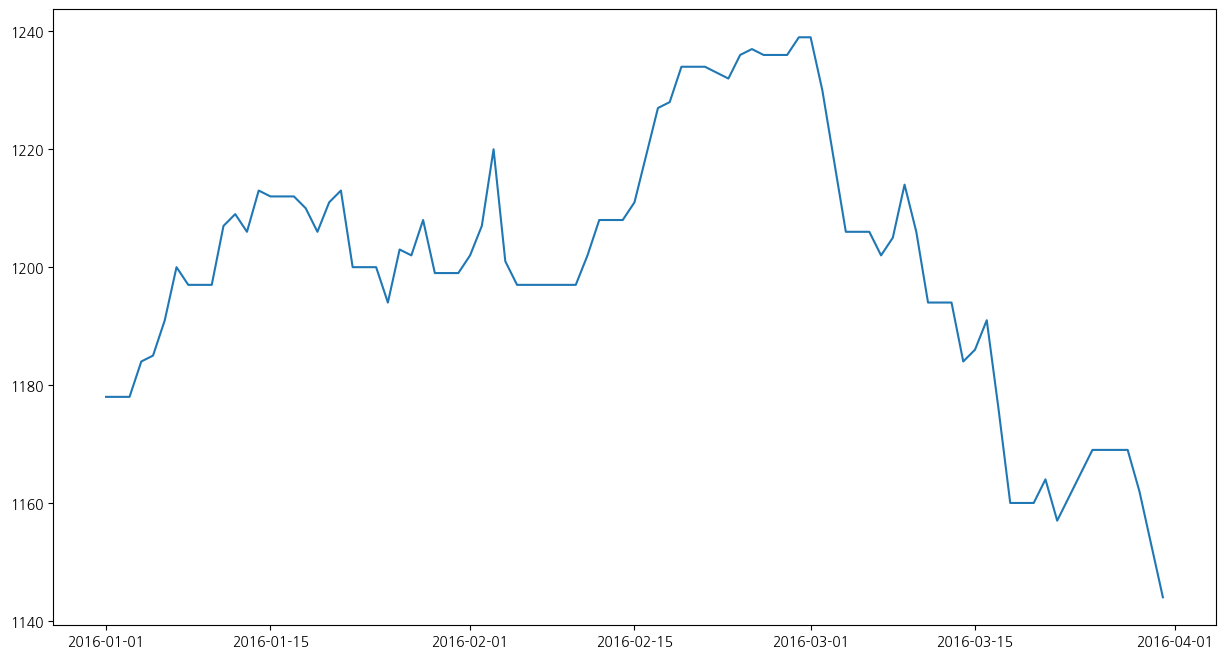

In [23]:
# 달러 변동 추세

plt.figure(figsize=(15,8))
plt.plot("APPL_DATE", "STD_RATE",data = df_raw)


In [27]:
# train test 분할
df_USD = df_USD.set_index("APPL_DATE")
df_USD_train = df_USD[df_USD.index <= "2016-03-22"]
df_USD_test = df_USD[df_USD.index > "2016-03-22"]
df_USD_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,1161
2016-03-24,1165
2016-03-25,1169
2016-03-26,1169
2016-03-27,1169


<Axes: xlabel='APPL_DATE'>

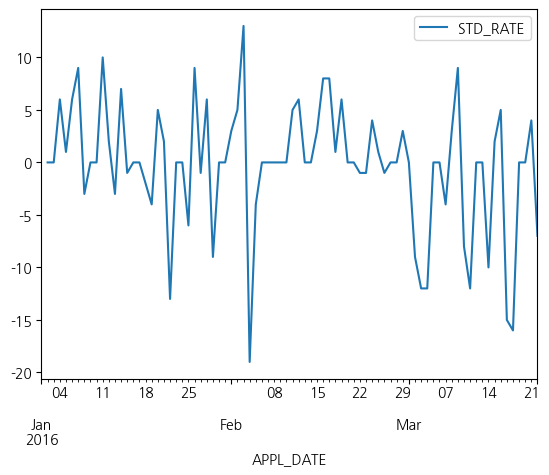

In [28]:
# 1차 차분 plot

df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

<Axes: xlabel='APPL_DATE'>

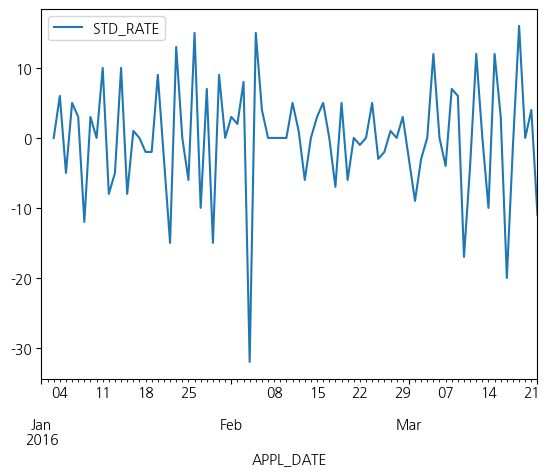

In [29]:
# 2차 차분 

df_USD_diff2 = df_USD_train - 2 * (df_USD_train.shift(1)) + df_USD_train.shift(2)
df_USD_diff2.plot()

In [47]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_USD_diff1[1:])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.827037304232959
p-value: 6.440408179957358e-12
Critical Values: {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625}


2차 차분까지 봤을 때 1차만 해도 정상성을 만족하므로 d = 1로 선정하였다. <BR>
ADF TEST 했을 때 P값이 0.05보다 작으므로 정상성을 만족한다.

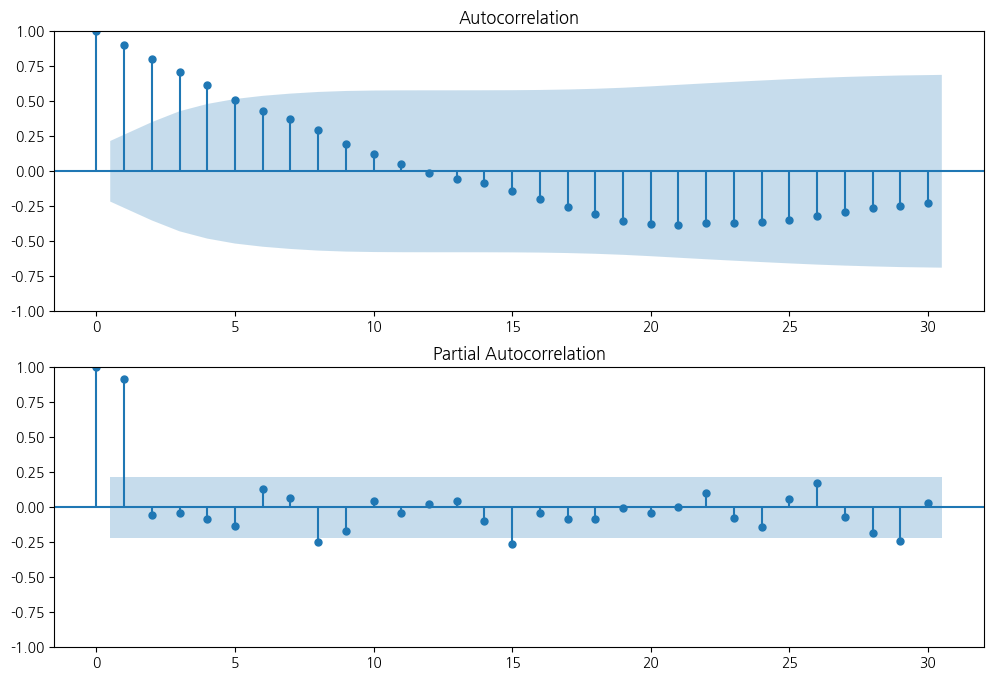

In [30]:
# 자기상관 함수 그래프
# 부분 자기상관 함수 그래프

lag_size = 30
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_USD_train["STD_RATE"], lags = lag_size , ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_USD_train["STD_RATE"], lags = lag_size , ax = ax2)

자기상관 함수 그래프는 연속적으로 감소하므로 q는 0으로 선정하였다. <br>
부분 자기상관 함수 절단면이 생긴 바로 앞 값은 2이므로 p를 1로 선정하였다.

In [36]:
ts_model_cny = ARIMA(df_USD_train, order = (1,1,0)) #(p,d,q) 생성
ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -260.449
Date:                Wed, 06 Mar 2024   AIC                            524.897
Time:                        15:41:56   BIC                            529.686
Sample:                    01-01-2016   HQIC                           526.819
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1122      0.085      1.319      0.187      -0.055       0.279
sigma2        36.3356      4.561      7.966      0.000      27.396      45.275
Ljung-Box (L1) (Q):                   0.01   Jarque-

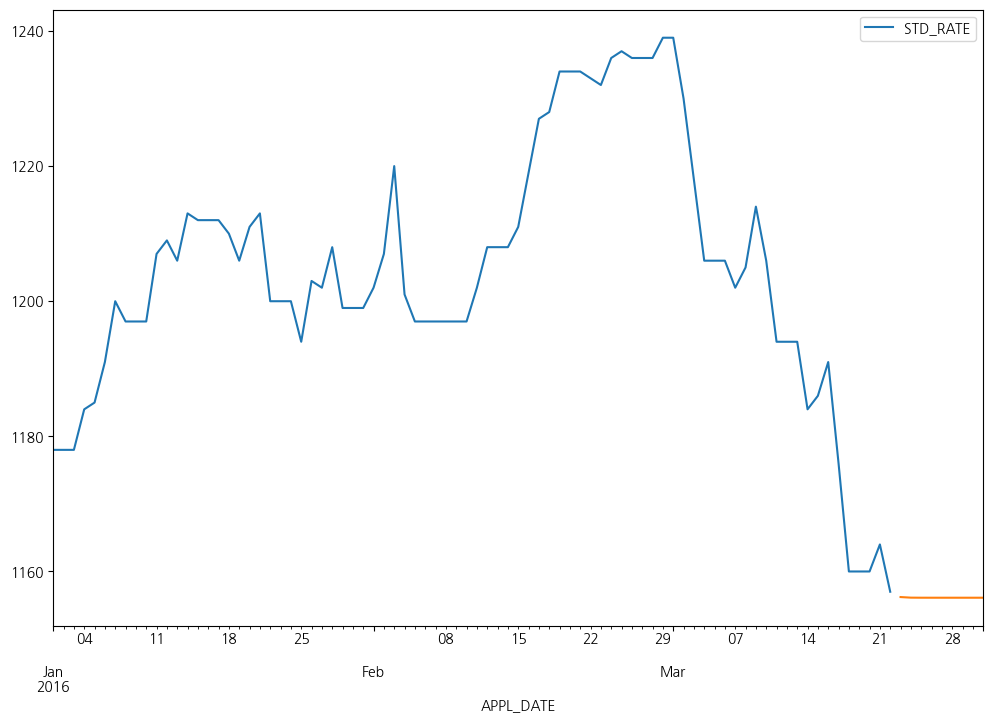

In [37]:
start_time = df_USD_test.index.min()
end_time = df_USD_test.index.max()
fig, ax = plt.subplots(figsize = (12, 8))
ax = df_USD_train.plot(ax = ax)
fig = ts_result_cny.predict(start = start_time , end = end_time , ax= ax, plot_insample = False).plot()

지속적으로 값이 일정할 것으로 예측된다.